In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('mnist_train.csv')

## Data Loading:

In [2]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(60000, 785)

In [4]:
data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


## Train Test Validate Split:

In [5]:
data = np.array((data))
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_validate = data[0:1000].T #validation data
Y_validate = data_validate[0]
X_validate = data_validate[1:n]
X_validate= X_validate / 255.

data_train = data[1000:m].T #train data 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train.shape

(59000,)

## Building the Architecture:
1) Initialization via  Normal distributed Xavier
2) Optimization via Momentum Accelerated Gradient Descent
3) Generalization via L2 Regularization
4) Non Linearity via the ReLU activation 

In [7]:
def init_params():
    
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))

    return W1, b1, W2, b2 



def ReLU(Z):
    return np.maximum(Z, 0)


def softMax(Z):
    Z -= np.max(Z, axis=0) 
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A



def deriv_ReLU(Z):
    return Z > 0


def forward_pass(W1, b1, W2, b2, X):

    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2 
    A2 = softMax(Z2)

    return Z1, A1, Z2, A2



def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T

    return one_hot_Y



def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):

    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2



def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, eta , beta, u_W1, u_b1, u_W2, u_b2):

    W1 = W1 - eta*(beta*u_W1 + dW1)
    b1 = b1 - eta*(beta*u_b1 + db1)  
    W2 = W2 - eta*(beta*u_W2 + dW2)
    b2 = b2 - eta*(beta*u_b2 + db2)
     
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def CE_loss(A, Y):
    return -1*np.sum(np.log(A[Y, range(A.shape[1])]))/Y.size


def neural_train(X, Y, eta, alpha, beta, epochs):
    W1, b1, W2, b2 = init_params()
    u_W1,u_b1,u_W2,u_b2 = 0, 0, 0, 0
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        dW1 = dW1 + alpha*W1
        db1 = db1 + alpha*b1
        dW2 = dW2 + alpha*W2
        db2 = db2 + alpha*b2
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, eta, beta, u_W1, u_b1, u_W2, u_b2)
        u_W1 += dW1
        u_b1 += db1
        u_W2 += dW2
        u_b2 += db2
        if i % 10 == 0:
            print("Iteration: ", i)
            print(f" Cross Entropy: {CE_loss(A2,Y)}")
    return W1, b1, W2, b2


## Model Training:

In [9]:
W1, b1, W2, b2 = neural_train(X_train, Y_train, 0.10, 0.005, 0.1, 1010) #alpha=0.005, train=0.384, test=0.91

Iteration:  0
 Cross Entropy: 2.361482005387657
Iteration:  10
 Cross Entropy: 2.1157835942632315
Iteration:  20
 Cross Entropy: 1.8214308317943677
Iteration:  30
 Cross Entropy: 1.4076611585033818
Iteration:  40
 Cross Entropy: 0.9897176661016979
Iteration:  50
 Cross Entropy: 0.7775902866829106
Iteration:  60
 Cross Entropy: 0.6901618482341396
Iteration:  70
 Cross Entropy: 0.6579090512777539
Iteration:  80
 Cross Entropy: 0.6450253828495477
Iteration:  90
 Cross Entropy: 0.6382259400502057
Iteration:  100
 Cross Entropy: 0.6350517499322271
Iteration:  110
 Cross Entropy: 0.633415647766397
Iteration:  120
 Cross Entropy: 0.6290400038334542
Iteration:  130
 Cross Entropy: 0.6179127204384784
Iteration:  140
 Cross Entropy: 0.5989118752774311
Iteration:  150
 Cross Entropy: 0.5735070112765397
Iteration:  160
 Cross Entropy: 0.5459494706709004
Iteration:  170
 Cross Entropy: 0.5197827599735096
Iteration:  180
 Cross Entropy: 0.4958472235939345
Iteration:  190
 Cross Entropy: 0.4732149561

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


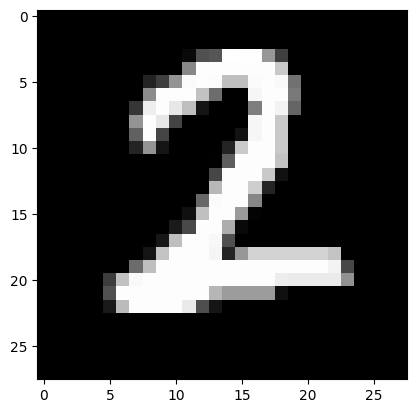

Prediction:  [6]
Label:  6


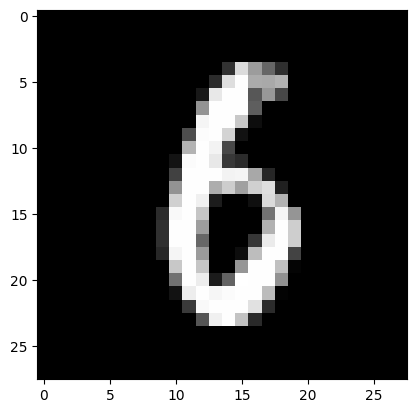

Prediction:  [7]
Label:  9


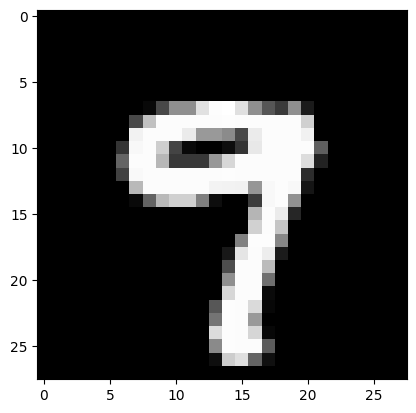

Prediction:  [0]
Label:  0


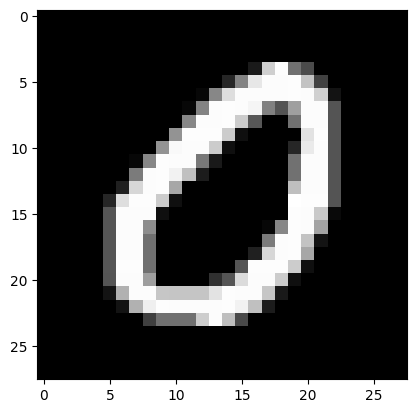

Prediction:  [3]
Label:  3


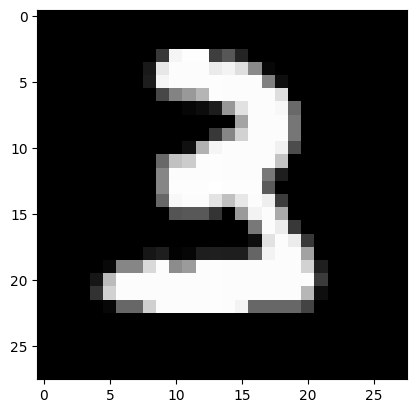

Prediction:  [1]
Label:  1


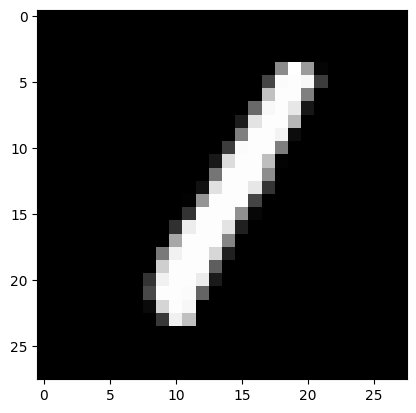

Prediction:  [8]
Label:  5


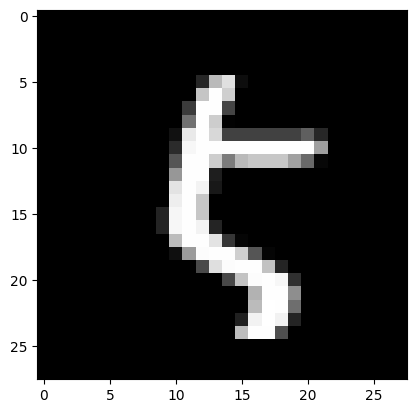

Prediction:  [9]
Label:  6


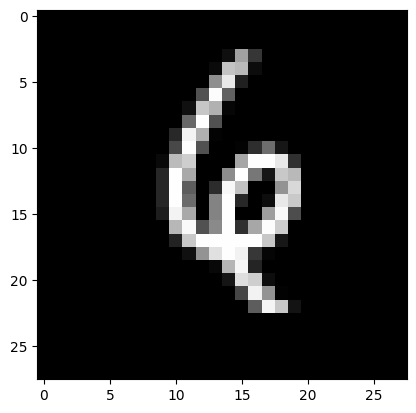

In [11]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(150, W1, b1, W2, b2)
test_prediction(270, W1, b1, W2, b2)
test_prediction(140, W1, b1, W2, b2)
test_prediction(1010, W1, b1, W2, b2)
test_prediction(1500, W1, b1, W2, b2)
test_prediction(2700, W1, b1, W2, b2)
test_prediction(1408, W1, b1, W2, b2)

## Validation:

In [12]:
dev_predictions = make_predictions(X_validate, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_validate)

[7 9 1 9 6 6 8 2 8 2 0 1 4 4 8 9 3 8 0 2 1 6 1 2 3 5 8 8 2 5 3 9 9 0 8 5 1
 1 9 7 8 7 3 2 5 1 1 0 4 9 8 0 6 9 6 9 1 2 2 8 2 9 7 4 9 5 3 4 1 1 5 4 1 4
 7 6 8 8 2 4 2 7 9 8 2 9 2 5 2 3 1 1 8 7 3 7 1 3 1 5 3 6 0 3 8 3 8 5 3 6 0
 5 1 2 6 8 0 6 2 0 1 5 7 0 6 0 8 7 4 1 1 7 1 4 4 1 2 5 6 8 2 8 7 2 5 1 1 3
 1 7 7 1 5 4 2 6 2 1 4 6 2 5 6 3 7 7 5 4 2 4 0 9 0 3 4 1 5 4 5 8 1 1 1 1 0
 4 9 7 0 2 3 7 5 7 1 6 5 6 0 6 1 3 5 1 0 8 2 1 3 3 9 1 5 0 1 7 5 3 1 8 8 0
 3 1 7 3 5 0 1 1 8 1 6 3 4 4 6 7 3 5 8 6 1 3 1 7 6 5 6 9 1 1 1 8 3 8 3 1 0
 0 1 0 0 6 0 3 5 6 9 4 8 4 8 0 5 0 5 3 9 9 9 5 4 8 7 9 1 6 9 3 5 9 8 0 7 1
 1 1 9 6 6 7 1 1 3 9 2 4 9 1 3 1 3 9 1 5 3 4 2 2 2 0 9 6 2 0 0 7 2 3 3 1 2
 3 7 3 4 1 9 8 2 6 3 8 4 7 0 1 1 9 4 1 9 6 1 7 0 3 6 6 1 0 3 7 6 8 7 4 4 7
 0 3 5 3 2 8 7 7 0 1 1 6 0 1 9 9 5 4 5 9 9 0 4 7 8 2 2 2 9 5 1 7 4 6 6 5 6
 2 5 7 9 3 4 2 4 9 6 0 7 0 3 6 2 8 1 7 4 2 0 2 6 3 1 1 0 1 9 7 8 5 4 2 1 0
 3 4 9 7 1 0 7 0 1 0 4 2 7 2 2 0 0 8 1 5 3 8 0 1 6 7 6 4 1 4 4 3 2 8 8 4 0
 4 4 4 5 0 5 9 3 0 9 8 0 

0.922